# Imports

In [82]:
#imports
import sklearn.datasets as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Data To Dataframe

In [83]:
#loading the data
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [84]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


# Checking If There Is Null Value

In [85]:
print(df.isna().sum())

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


# Visualizing Data

<Axes: >

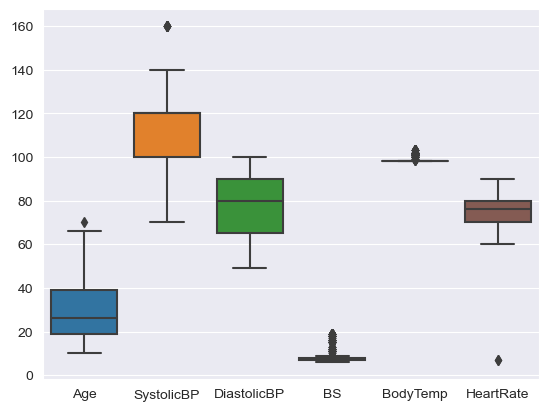

In [86]:
sns.boxplot(data=df)

Χρησιμοποιούμε boxplot για να ελέγξουμε εάν υπάρχει κάποια outlier τιμή που θα επηρεάσει το μοντέλο

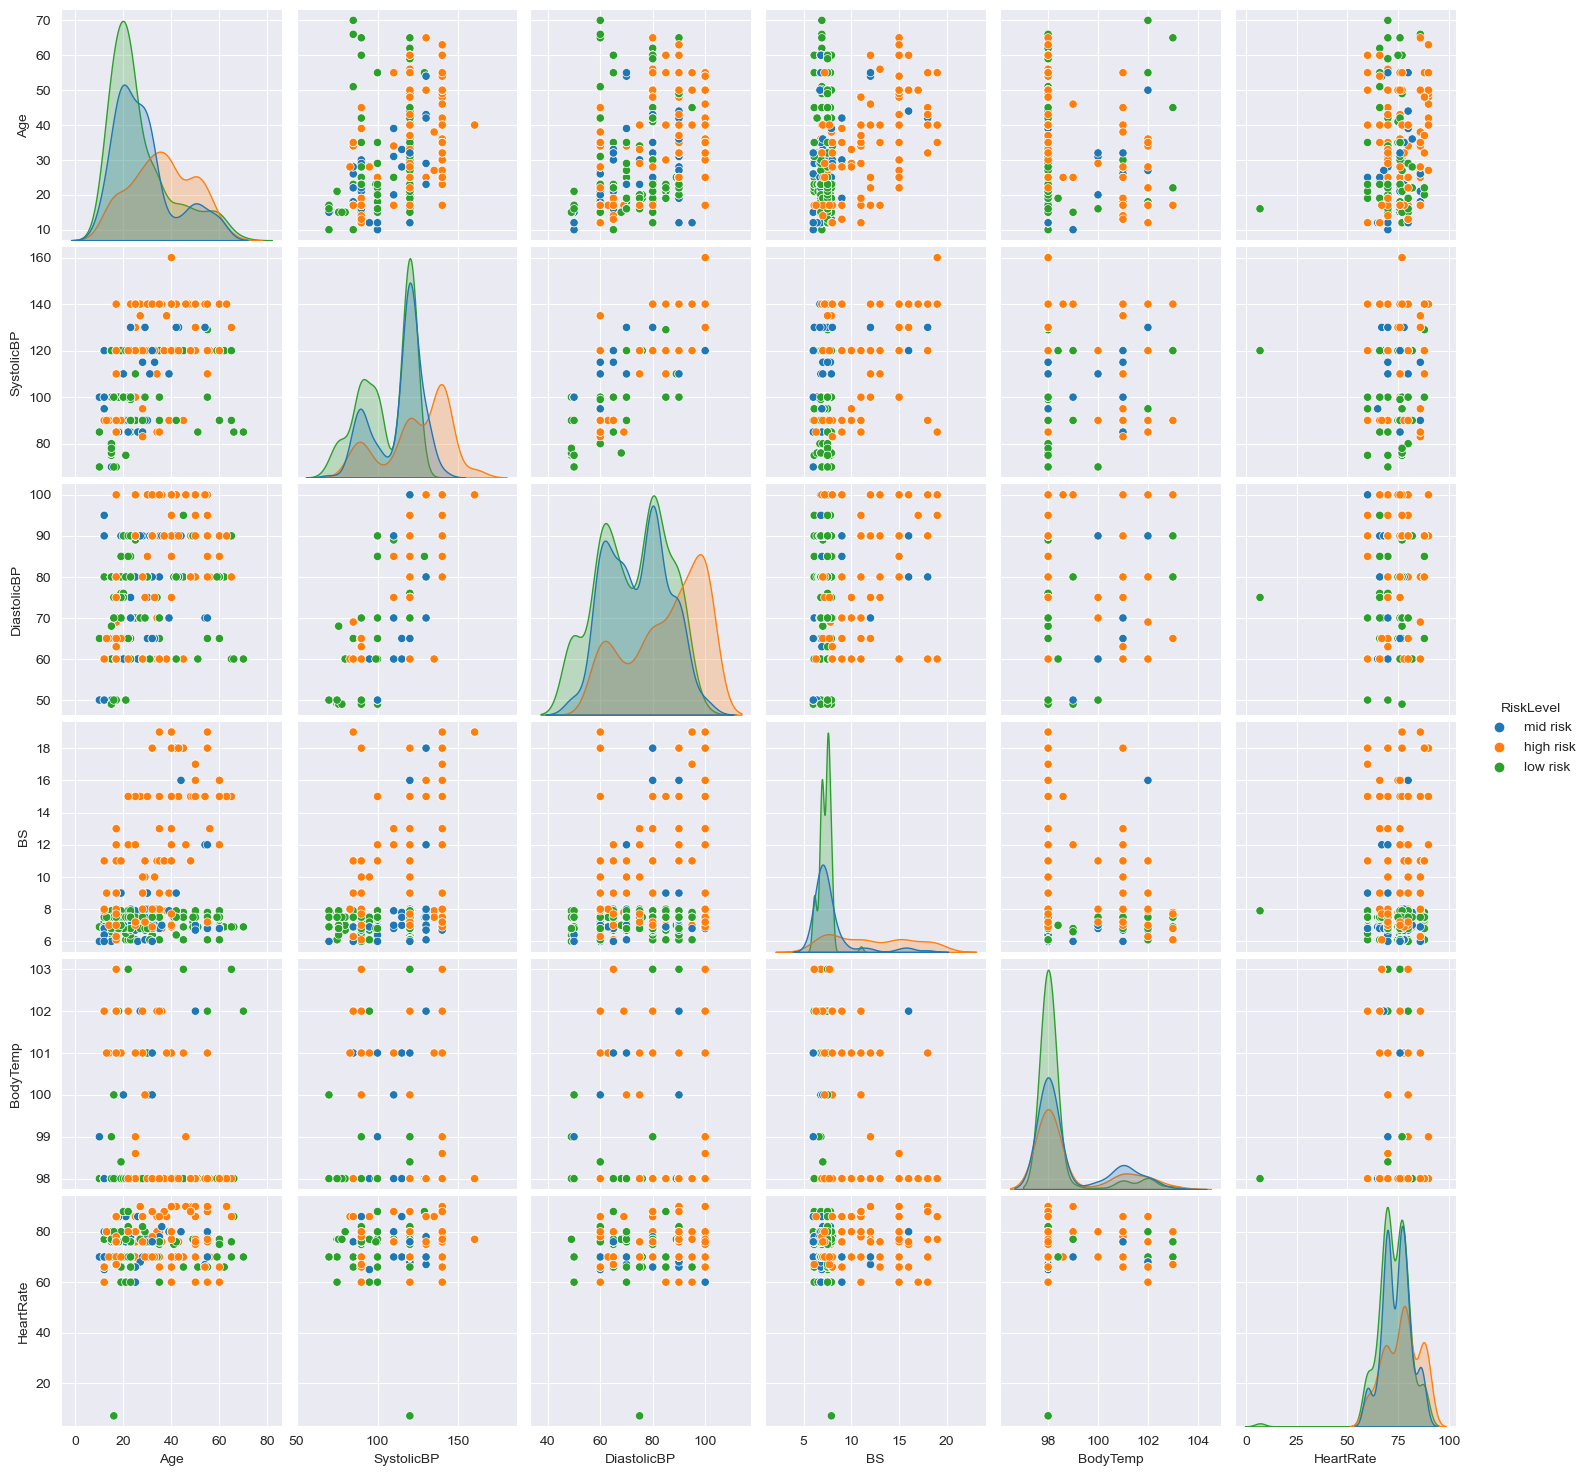

In [87]:
sns.set_style('darkgrid')
sns.pairplot(df, diag_kws={'color':'#03C988'}, hue="RiskLevel", hue_order=["mid risk", "high risk", "low risk"])

Για τη DiastolicBP, ο μεγαλύτερος αριθμός για ασθενείς υψηλού κινδύνου πέφτει σε υψηλότερο εύρος DiastolicBP(περίπου 100), ενώ οι ασθενείς χαμηλού/μεσαίου κινδύνου έχουν χαμηλότερη DiastolicBP(60-80). Το ίδιο ισχύει και για την SystolicBP. Επιπλέον, παρατηρούμε οτι οι ασθενείς που ειναι σε μεγαλύτερη ηλικία(περίπου στα 40) διατρέχουν μεγαλύτερο κίνδυνο. Τέλος το Pairplot μας δείχνει οτι ίσως υπάρχει συσχέτιση μεταξύ των diastolicBP/systolicBP, age/diastolicBP, age/systolicBP. Αύτο θα το αναλύσουμε χρησιμοποιώντας τον συντελεστή συσχέτισης Pearson.

In [88]:
corr = df.corr()
corr

C:\Users\kosta\AppData\Local\Temp\ipykernel_8952\2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


Από τον συντελεστή συσχέτισης Pearson, βλέπουμε οτι υπάρχει ισχυρή συσχέτιση μεταξύ των DiastolicBP/SystolicBP (r=0.78) και μέτριες συσχετίσεις μεταξύ Age/SystolicBP(r=0.41), Age/BS(r=0.47).

C:\Users\kosta\AppData\Local\Temp\ipykernel_8952\3207952889.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True)


Text(0.5, 1.0, 'Correlation Heatmap')

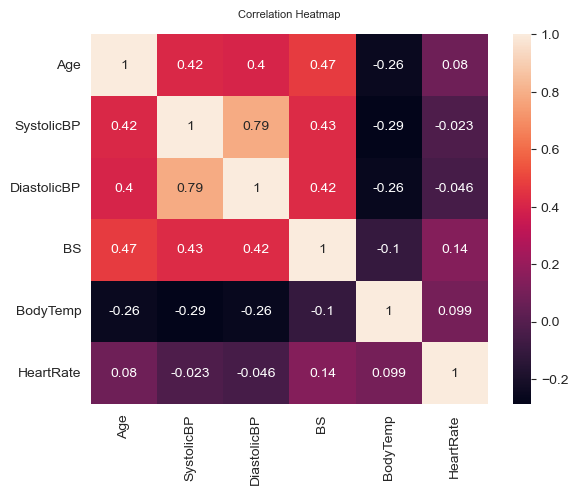

In [89]:
heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)

Χρησιμοποιώντας Heatmap μπορούμε να διακρίνουμε πιο εύκολα τις συσχετίσεις των μεταβλητών

# Transforming to Int the attribute RiskLevel

In [90]:
from sklearn import preprocessing
lable_encoder = preprocessing.LabelEncoder()
df['RiskLevel'] = lable_encoder.fit_transform(df['RiskLevel'])
df['RiskLevel'].unique()

array([0, 1, 2])

In [91]:
df= df.drop(["HeartRate"], axis=1)

Από τα γραφήματα συμπεραίνουμε οτι η HeartRate δεν είναι σημαντική για τα αποτελέσματα

# Normalizing the data 

In [92]:
from sklearn.preprocessing import StandardScaler

scaled_columns = StandardScaler().fit_transform(df.values)
scaled_df = pd.DataFrame(scaled_columns, index=df.index, columns=df.columns)
scaled_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,RiskLevel
0,-0.361738,0.913396,0.255023,1.905890,-0.485215,-1.377512
1,0.380777,1.457027,0.975539,1.298340,-0.485215,-1.377512
2,-0.064732,-1.261127,-0.465493,-0.220537,0.973884,-1.377512
3,0.009519,1.457027,0.615281,-0.524312,-0.485215,-1.377512
4,0.380777,0.369765,-1.186009,-0.797710,-0.485215,-0.081782


# Train/test split

In [112]:

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(scaled_df, test_size=.4, random_state=42)

predictors_train = train_set.drop('RiskLevel', axis=1)

labels_train = df.loc[predictors_train.index,'RiskLevel']

predictors_test = test_set.drop('RiskLevel', axis=1)

labels_test = df.loc[predictors_test.index,'RiskLevel']


# Model Training

In [94]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(predictors_train,labels_train)

In [165]:
from sklearn.metrics import mean_squared_error,r2_score

import numpy as np 

def metrics(labels,predictions):
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    r2_value=r2_score(labels,predictions)
    print(f'RMSE for Train Set: {rmse}')
    print(f'r_squared (Coefficient of Determination): {r2_value}')

Function για να ελέγχουμε την απόδοση του αλγορύθμου

In [101]:
predictions_train = RFC.predict(predictors_train)
print("RFC Model (Training Set)")
metrics(labels_train,predictions_train)


predictions_test = RFC.predict(predictors_test)
print("RFC Model (Test Set)")
metrics(labels_test,predictions_test)

RFC Model (Training Set)
RMSE for Train Set: 0.3218981532296071
r_squared (Coefficient of Determination): 0.8213832724017012
RFC Model (Test Set)
RMSE for Train Set: 0.5872202195147035
r_squared (Coefficient of Determination): 0.44180382605963


In [102]:
from sklearn.metrics import classification_report
print(classification_report(labels_test,predictions_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       109
           1       0.82      0.78      0.80       152
           2       0.76      0.75      0.75       145

    accuracy                           0.80       406
   macro avg       0.81      0.81      0.81       406
weighted avg       0.80      0.80      0.80       406



Χρησιμοποιώ την classification_report για να δω πόσο ακριβώς απόδοσε το set

<Axes: >

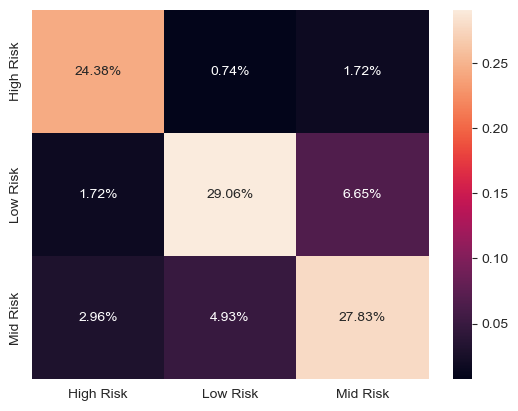

In [162]:
cf_matrix = confusion_matrix(labels_test,predictions_test)

labels=['High Risk','Low Risk','Mid Risk']
sns.heatmap(cf_matrix/np.sum(cf_matrix), fmt='.2%',annot=True, yticklabels=labels,xticklabels=labels)

Μέσω του πίνακα σύγχυσης, αντιλαμβανόμαστε οτι το μοντέλο χωρίς το βέλτιστο n_estimetor βγάζει αποδοτικά αποτελέσματα.

In [178]:
error_rate = []

for i in range(1,200):
    
    RFC = RandomForestClassifier(n_estimators=i)
    RFC.fit(predictors_train,labels_train)
    pred_i = RFC.predict(predictors_test)
    error_rate.append(np.mean(pred_i != labels_test))

Το loop αυτό μας δίνει το καλύτερο n-estimator ελέγχοντας

Text(0, 0.5, 'Error Rate')

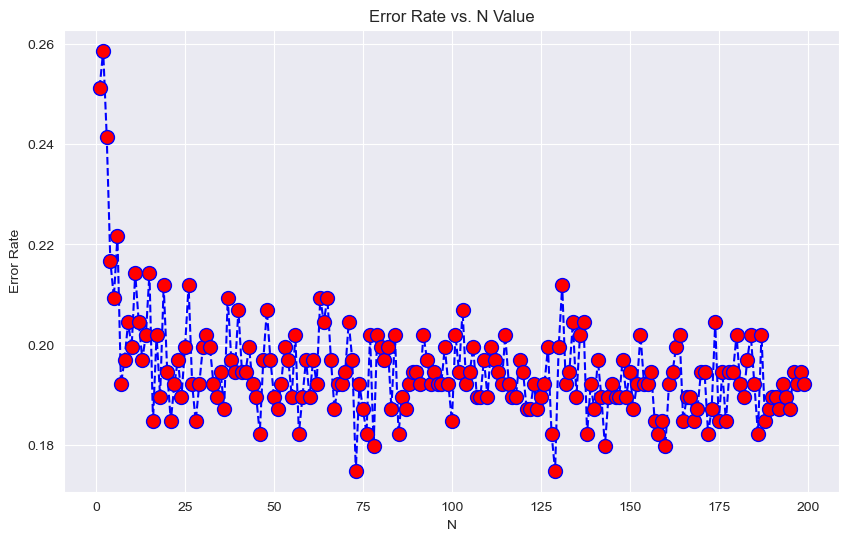

In [179]:
plt.figure(figsize=(10,6))
plt.plot(range(1,200),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. N Value')
plt.xlabel('N')
plt.ylabel('Error Rate')

In [180]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=180, random_state=42)
RFC.fit(predictors_train,labels_train)

RandomForestClassifier(n_estimators=180, random_state=42)

In [159]:
predictions_train = RFC.predict(predictors_train)
print("RFC Model (Training Set)")
metrics(labels_train,predictions_train)


predictions_test = RFC.predict(predictors_test)
print("RFC Model (Test Set)")
metrics(labels_test,predictions_test)

RFC Model (Training Set)
RMSE for Train Set: 0.3218981532296071
r_squared (Coefficient of Determination): 0.8213832724017012
RFC Model (Test Set)
RMSE for Train Set: 0.572351471472339
r_squared (Coefficient of Determination): 0.4697136347566484


In [181]:
from sklearn.metrics import classification_report
print(classification_report(labels_test,predictions_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       109
           1       0.84      0.78      0.81       152
           2       0.77      0.78      0.77       145

    accuracy                           0.81       406
   macro avg       0.81      0.82      0.82       406
weighted avg       0.81      0.81      0.81       406



<Axes: >

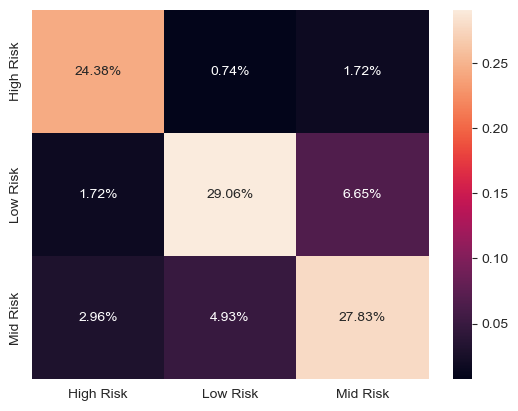

In [182]:
cf_matrix = confusion_matrix(labels_test,predictions_test)

labels=['High Risk','Low Risk','Mid Risk']
sns.heatmap(cf_matrix/np.sum(cf_matrix), fmt='.2%',annot=True, yticklabels=labels,xticklabels=labels)